<a href="https://colab.research.google.com/github/Delta9529/Churn-Model/blob/main/INSAID_CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Data & Manipulation

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/INSAID_churn/Churn.csv")

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data = data.drop('customerID',axis = 1)

In [ ]:
#Checking the number of value counts
for i in data.columns:
    x = data[i].value_counts()
    print("Column name is:",i,"and it value is:",x) #The data looks fine no class imbalance

Column name is: gender and it value is: Male      3555
Female    3488
Name: gender, dtype: int64
Column name is: SeniorCitizen and it value is: 0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Column name is: Partner and it value is: No     3641
Yes    3402
Name: Partner, dtype: int64
Column name is: Dependents and it value is: No     4933
Yes    2110
Name: Dependents, dtype: int64
Column name is: tenure and it value is: 1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Column name is: PhoneService and it value is: Yes    6361
No      682
Name: PhoneService, dtype: int64
Column name is: MultipleLines and it value is: No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Column name is: InternetService and it value is: Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Column name is: O

In [ ]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'ignore') #Converting TotalCharges from Object to float

In [ ]:
data['TotalCharges'] = data['TotalCharges'].replace([" ","NaN"], 0).astype('float32') # Replacing some of the errors in the column because it showed error while model fitting

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']] = data[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']].apply(le.fit_transform)

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.850000,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.500000,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.150002,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.750000,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.649994,1


Data Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf819f2d90>,
      dtype=object)

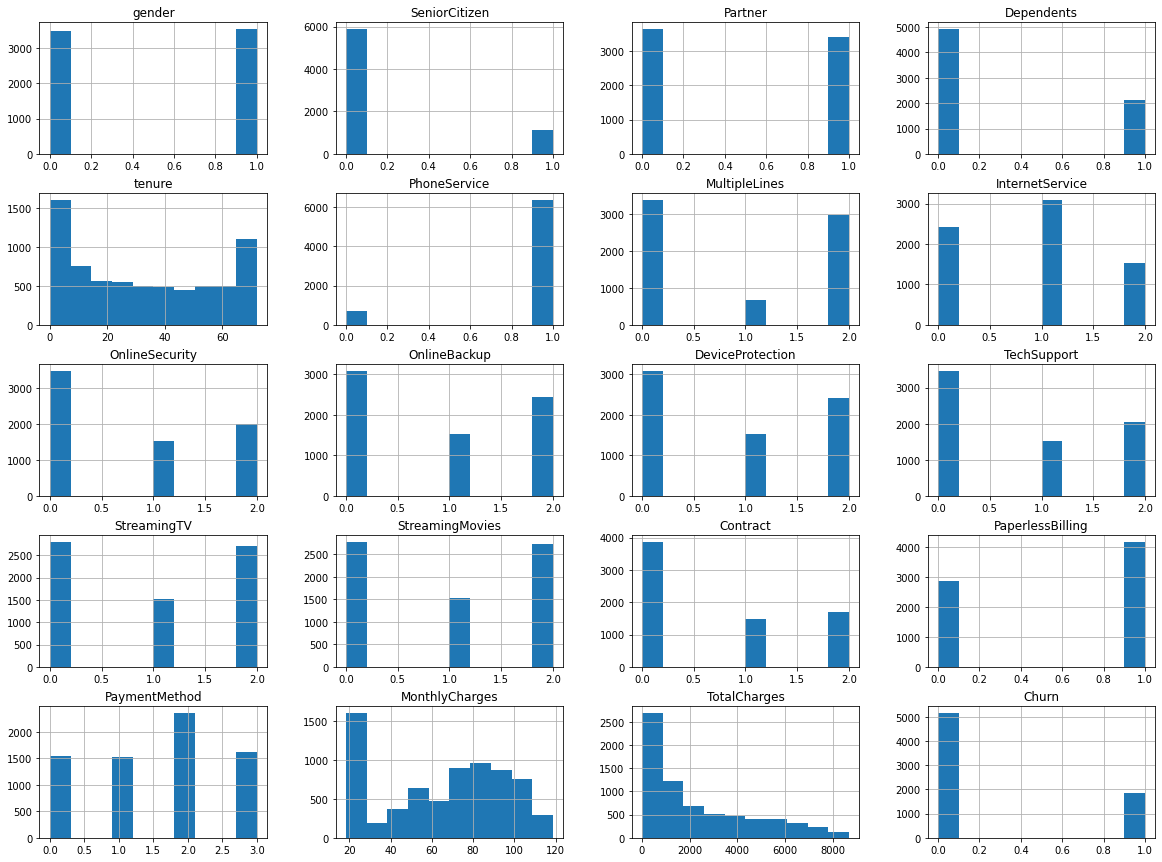

In [ ]:
data.hist(figsize=(20,15))

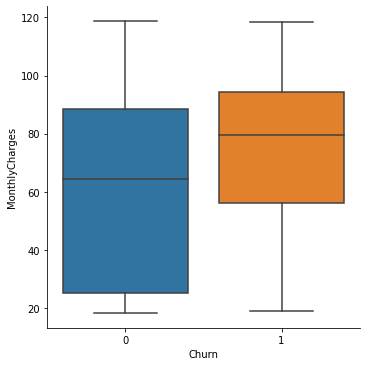

In [ ]:
sns.catplot(x="Churn", y="MonthlyCharges",kind ='box',data=data) #People whose monthly charges are higher tend to leave

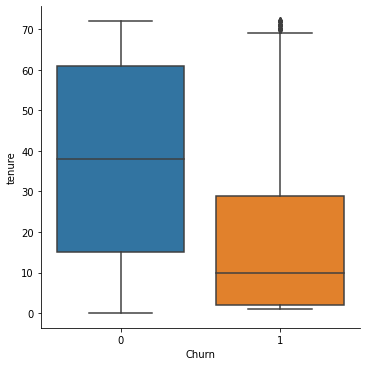

In [ ]:
sns.catplot(x="Churn", y="tenure",kind ='box',data=data) #People with less tenure are likely to leave

Model fitting

In [ ]:
x = data.drop('Churn',axis = 1)
y = data.Churn
print(x.shape)
print(y.shape)

(7043, 19)
(7043,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.41,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4155, 19)
(4155,)
(2888, 19)
(2888,)


DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier0 = DecisionTreeClassifier(criterion = 'entropy',random_state =0)
classifier0.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = classifier0.predict(x_test)
print(y_pred)

[0 0 1 ... 1 0 1]


In [ ]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test,y_pred)
acc

0.7313019390581718

K-NN Classifiers

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski',p=2)
classifier1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_kn = classifier1.predict(x_test)
print(y_pred_kn)

[1 0 1 ... 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test,y_pred_kn)
acc

0.7707756232686981

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state=0)
classifier2.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lg = classifier2.predict(x_test)
print(y_pred_lg)

[0 0 0 ... 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test,y_pred_lg)
acc

0.792590027700831

RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10,criterion ='entropy',random_state = 0)
classifier3.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf = classifier3.predict(x_test)
print(y_pred_rf)

[0 0 0 ... 1 0 1]


In [ ]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test,y_pred_rf)
acc

0.7870498614958449

LOGISTIC REGRESSION is the best model to fit


People whose monthly charges are higher tend to leave

People with less tenure are likely to leave